In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Pritning data distribution for the area_type column
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
# Dropping unnecessary columns
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# 1) Data Cleaning Process

In [5]:
# Print the number of NaN values for each column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
# Drop NaN values
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
# List all values of the size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### "Bedroom" and "BHK" mean the same thing, therefore having both is redundant. Therefore, we create a new column with just the number.

In [8]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Kostas\AppData\Local\Temp/ipykernel_10716/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Now it's easier to do things like print houses that have above or under a certain number of BHK.

In [11]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### Spotted a value that's a range (1133 - 1384) instead of a number. We want to convert it.

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
# The ~ is a negate operation. Printing all non-float values of the total_sqft column.
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')  # Split each row when you see a - character (range)
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2  # If we had a range, return the mean value.
    try:
        return float(x) # Return the number as a float. If there were alphabetical characters, return nothing.
    except:
        return None

In [16]:
convert_sqft_to_num('2166')

2166.0

In [17]:
convert_sqft_to_num('2166 - 2544')

2355.0

In [18]:
convert_sqft_to_num('2166 Perch')

In [19]:
df4 = df3.copy()
df4['total_sqft'] =  df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [20]:
df4.loc[30]  # Line 30 had a range in its total_sqft in df3. Comparing that to df4.

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# 2) Feature Engineering

In [21]:
# Creating a new column that contains the computed price per square square feet for our dataset.
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
# Number of locations in the dataset
len(df5['location'].unique())

1304

### If we use One Hot Encoding (OHE) for the locations, we'll create a dataset with over 1300 columns, which is just too much.

In [23]:
df5['location'] = df5['location'].apply(lambda x: x.strip())  # Removing extra spaces from the columns

# How many entries are there per location? Print in descenting order
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

### Any location with less than 10 entries will be converted into "other locations"

In [24]:
len(location_stats[location_stats<=10]) # Num of locations with less than 10 entries

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df5['location'].unique())

1293

In [27]:
# Replacing all locations with less than 10 entries with "other"
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

242

# 3) Outlier Removal

### We assume that 300 sqft per bedroom (BHK) is a typical threshold for a house.

In [28]:
# What entries don't match the criteria above
less_than_300_per_sqft = df5[df5['total_sqft'] / df5['bhk'] < 300]
less_than_300_per_sqft.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
len(less_than_300_per_sqft)

744

In [30]:
df5.shape

(13246, 7)

In [31]:
# ~ (Negative Operation). New Dataframe with all the entries except those that don't meet the criteria.
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 300)]
df6.shape

(12502, 7)

### Now we turn our attention to price_per_sqft. We will remove the extreme cases for min/max.

In [32]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
# Per location, find the mean and std (standard devation) and then remove any locations that are beyond 1 std.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        # If the price is beyond 1 std for that location (either above or below), remove it.
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [34]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

### The next problem concerns cases like: houses with 2 and 3 BHK, around the same total_sqft value, but the house with less bedrooms actually costs more.

In [35]:
# Method that visualizes the above problem in a scatter plot.
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50, marker='*')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

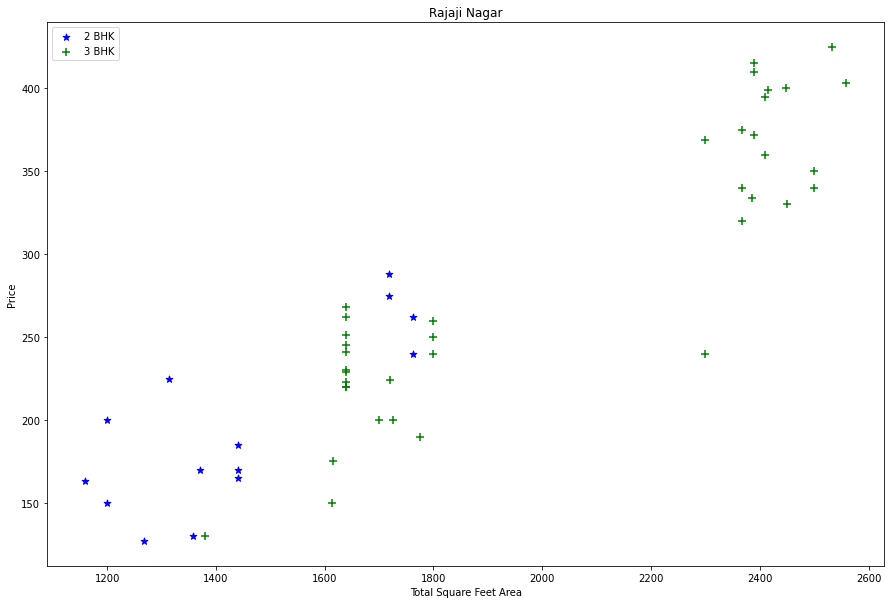

In [36]:
plot_scatter_chart(df7, 'Rajaji Nagar')

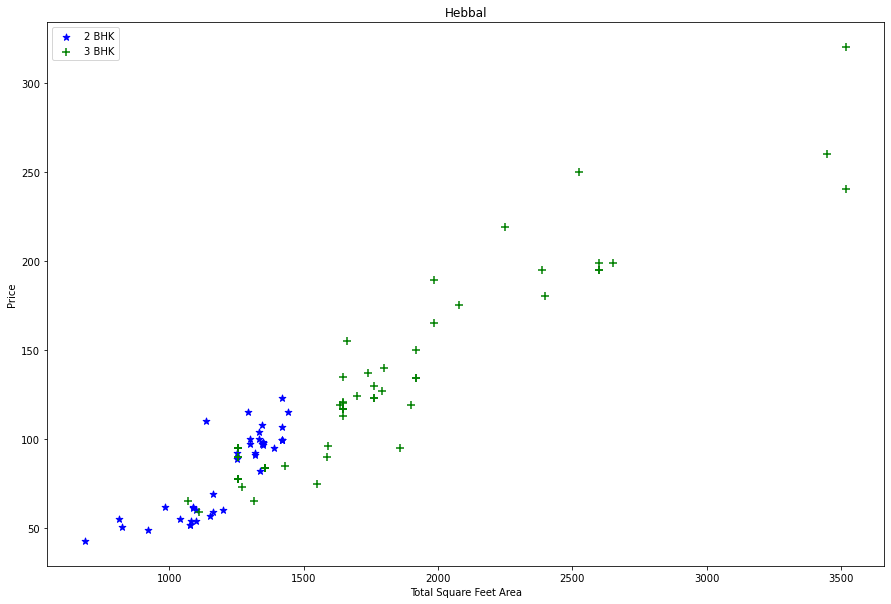

In [37]:
plot_scatter_chart(df7, 'Hebbal')

### In both of the above plots we find cases where 2 BHK buildings (blue) are more expensive than 3 BHK (green). We will remove them.

**We should also remove properties where for the same location, the price of (for example) a 3 bedroom apartment is less than a 2 bedroom apartment's (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than the mean price_per_sqft of 1 BHK apartment**

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):  # For every location create a new dataframe and then from there,
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):  # For every location create new dataframes for bhk.
            bhk_stats[bhk] = {  # For every bhk compute mean, std, count
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        """
        Now that we have the needed stats, we run the same for loop again and exclude the datapoints who's price_per_sqft
        is less than the mean of the previous bhk.
        """
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [39]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

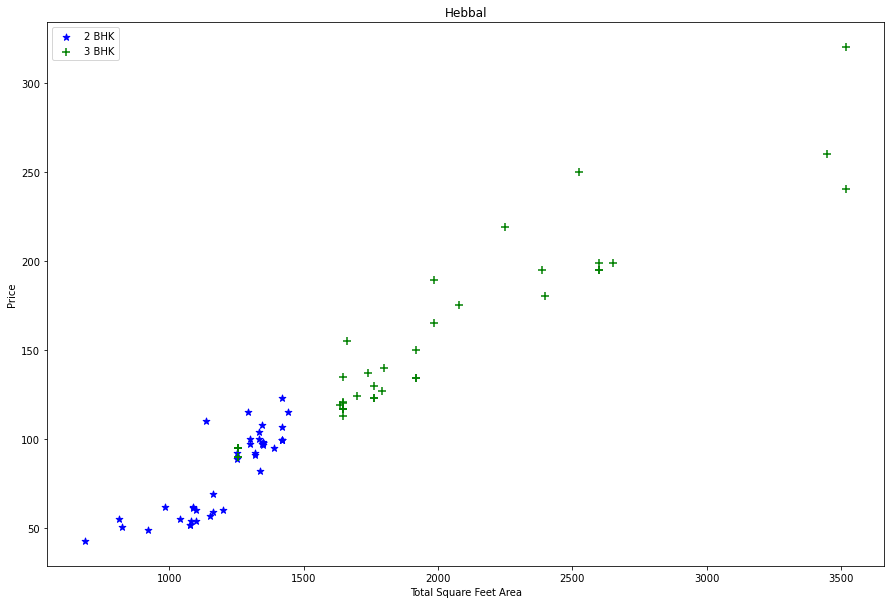

In [40]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

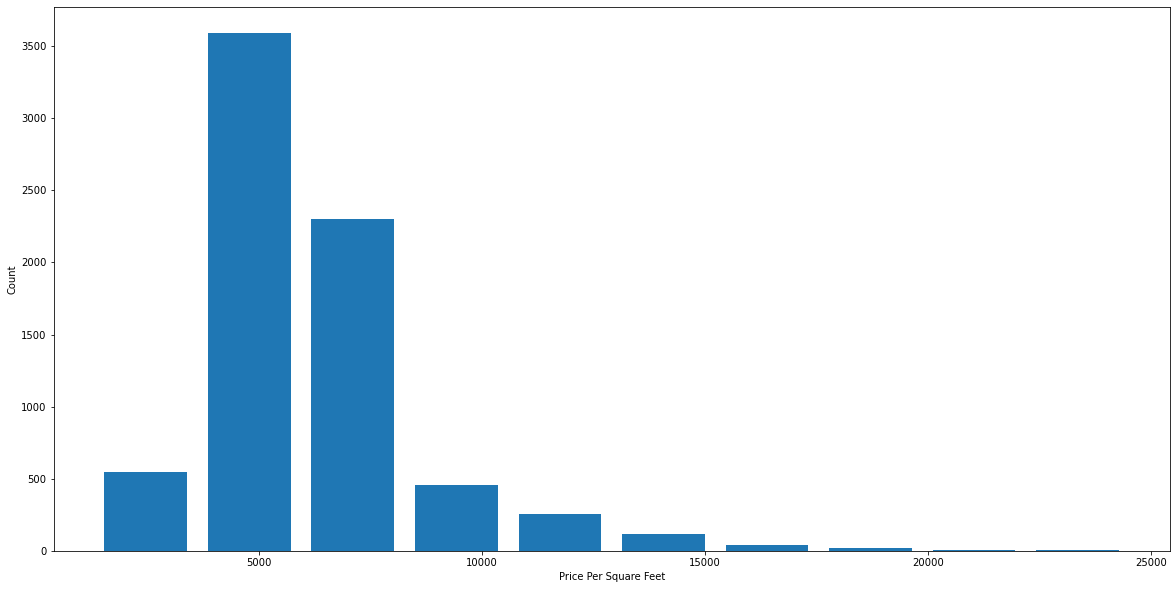

In [41]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

### The prices seem to have a normal distribution, but what about the bathrooms?

In [42]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df8[df8['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


### Let's assume that there shouldn't be any houses with more bathrooms than (bedrooms + 2). We will remove such cases.

Text(0, 0.5, 'Count')

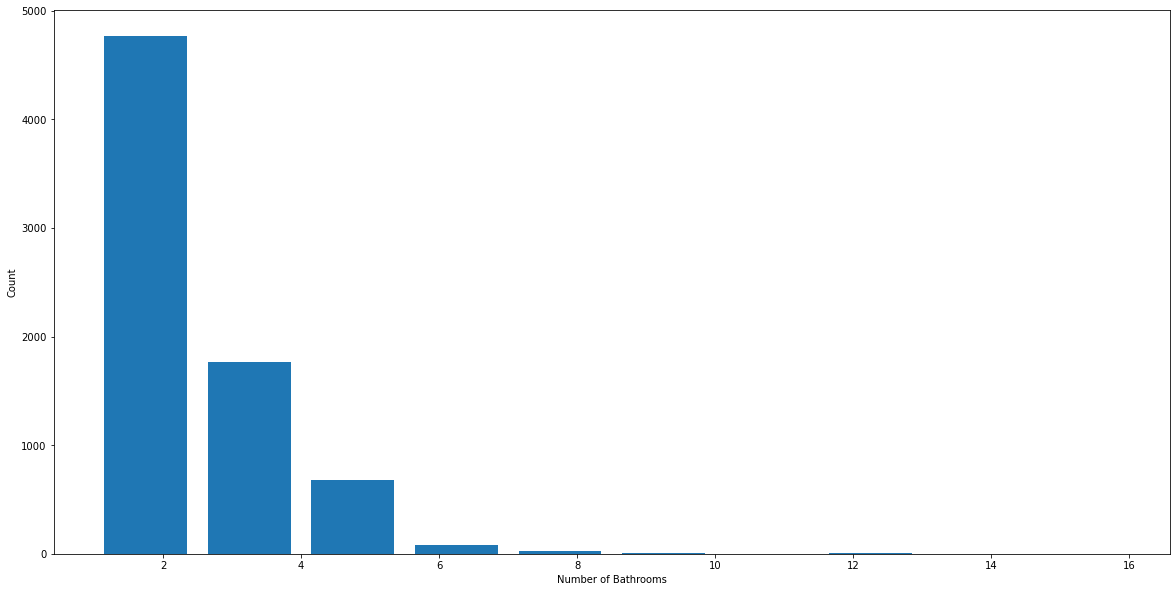

In [44]:
plt.hist(df8['bath'], rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [45]:
df8[df8['bath'] > df8['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df9 = df8[df8['bath'] < df8['bhk']+2]
df9.shape

(7251, 7)

### The Dataset is almost ready to be used in machine learning features. Now we just remove any remaining unnecessary columns.

In [47]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
